<a href="https://colab.research.google.com/github/marcgym2/MachineLearning/blob/main/Tarea_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea en clase (2 puntos)

- Crear funciones para calcular las medidas de tendencia central y de dispersión con Python puro (sin librerías)
- Comprueba si tus variables de interés son conjuntos de datos paramétricos o no paramétricos

In [14]:
import math
import pandas as pd
# Permite mostrar markdown como saliuda en Jupyter
from IPython.display import Markdown
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [15]:
df_measures = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/measures_v2.csv")

In [ ]:
df_measures.describe().T

,count,mean,std,min,25%,50%,75%,max
u_q,1330816.0,54.279005,44.173234,-25.290930,12.069925,48.938181,90.034393,133.036994
coolant,1330816.0,36.229995,21.786149,10.623751,18.698135,26.900141,49.857487,101.598512
stator_winding,1330816.0,66.342745,28.672061,18.585815,42.787957,65.110129,88.141137,141.362885
u_d,1330816.0,-25.133809,63.091972,-131.530411,-78.690904,-7.429755,1.470271,131.469788
stator_tooth,1330816.0,56.878582,22.952233,18.133976,38.416012,56.036345,75.586682,111.946423
motor_speed,1330816.0,2202.080728,1859.663350,-275.549144,317.110665,1999.976685,3760.639058,6000.015137
i_d,1330816.0,-68.716810,64.933233,-278.003632,-115.406060,-51.093763,-2.979688,0.051897
i_q,1330816.0,37.412782,92.181880,-293.426793,1.095863,15.774007,100.612150,301.707855
pm,1330816.0,58.506776,19.001498,20.856956,43.151582,60.266287,72.008371,113.606628
stator_yoke,1330816.0,48.187965,19.991004,18.076689,31.990333,45.625509,61.460828,101.147964


In [63]:
df_measures_mod_2.describe().T

,count,mean,std,min,25%,50%,75%,max
u_q,19357.0,5.894508,2.231838,3.919605,4.142478,4.175154,8.747538,8.798512
coolant,19357.0,18.542054,0.328558,15.594865,18.353586,18.526077,18.705246,19.774647
stator_winding,19357.0,51.110270,37.978699,19.428793,19.723171,19.880793,101.761406,103.282516
u_d,19357.0,-2.815422,5.474471,-9.820481,-9.799939,1.468360,1.496622,1.701082
stator_tooth,19357.0,39.106455,23.995088,18.618843,19.133394,19.850620,71.133781,72.121727
motor_speed,19357.0,100.000216,0.026217,99.422050,99.983826,99.999466,100.016319,100.552002
i_d,19357.0,-48.212822,58.754778,-122.974426,-122.971855,-2.001389,-2.000436,0.001466
i_q,19357.0,93.315905,117.213201,-0.003094,1.096946,1.098519,242.423538,242.425613
pm,19357.0,32.759597,7.544091,22.970417,25.651463,31.252665,39.810726,45.985561
stator_yoke,19357.0,31.642673,15.183870,18.299831,19.013332,19.744173,51.965973,52.602722


In [19]:
# Función para calcular la media tomando como input un DataFrame y Columna de Interes. 
def fn_mean(df, col):
    return (sum(df[col])/df.count()).iloc[0]

# Calculando la media del torque del motor en el DataFrame df_measures.
print(fn_mean(df_measures, 'torque'))

31.1060323797327


In [61]:

# Utilizando solamente los datos de la segunda sesión. 
in_2 = df_measures['profile_id'] == 2
df_measures_mod_2 = df_measures[in_2]


In [51]:
# Función para la calcular la mediana utilizando como input un DataFrame y su columna
def fn_median(df, col):
    new_array = df[col].array
    ordered_array = sorted(new_array)
    if len(ordered_array) % 2 != 0:
      return ordered_array[len(ordered_array)//2] # floor division
    else:
      return (ordered_array[len(ordered_array)-1] + ordered_array[len(ordered_array)+1])/2  

# Calculando la mediana de velocidad del motor de los datos obtenidos en la sesión 2. 
print(fn_median(df_measures_mod_2, 'motor_speed'))

99.9994659423828


In [53]:
def fn_stddev(ls):
    n = len(ls)
    mean = sum(ls) / n
    var = sum((x - mean)**2 for x in ls) / n
    std_dev = var ** 0.5
    return std_dev
# create a list of data points
ls = [7, 2, 4, 3, 9, 12, 10, 2]
print(fn_stddev(ls))

3.6550478793033614


In [58]:
# Función para calcular la desviación estándar utilizando como input DataFrame y Columna. 
def fn_stddev(df, col):
    new_array = df[col].array
    n = len(new_array)
    mean = sum(new_array) / n
    var = sum((x - mean)**2 for x in new_array) / n
    std_dev = var ** 0.5
    return std_dev

# Calculando la desviación estándar del torque. 
print(fn_stddev(df_measures, 'torque'))



77.13572583057403


In [59]:
# Función para calcular la varianza utilizando como input DataFrame y Columna. 
def fn_stddev(df, col):
    new_array = df[col].array
    n = len(new_array)
    mean = sum(new_array) / n
    var = sum((x - mean)**2 for x in new_array) / n
    return var

# Calculando la varianza del torque. 
print(fn_stddev(df_measures, 'torque'))



5949.9201994094865


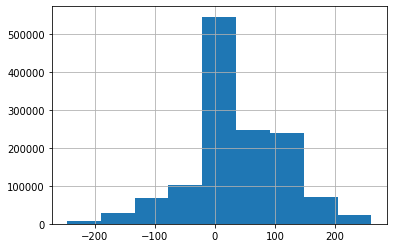

In [71]:
df_measures.torque.hist(bins = 9)


In [80]:
# Comprando si la variable de interés, torque, son conjuntos de datos paramétricos o no paramétricos

from scipy.stats import shapiro
data = df_measures.torque.sample(50) # La prueba de Shapiro-Wilk es el método más apropiado para tamaños de muestra pequeños (<50 muestras)
stat, p = shapiro(data)
alpha = 0.05
if p < alpha:
    print(f'Asumimos que la distribución de nuestra variable no es normal/gaussiana con p = {round(p, 4)}')
else:
    print(f'Asumimos que la distribución de nuestra variable es normal/gaussiana con p = {round(p, 4)} ')
     

Asumimos que la distribución de nuestra variable no es normal/gaussiana con p = 0.0129
